In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline


In [38]:
df = pd.read_csv('Mall_Customers.csv')

In [39]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [40]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [41]:
df.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [42]:
df = df.iloc[:,3:5].values

In [43]:
df

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

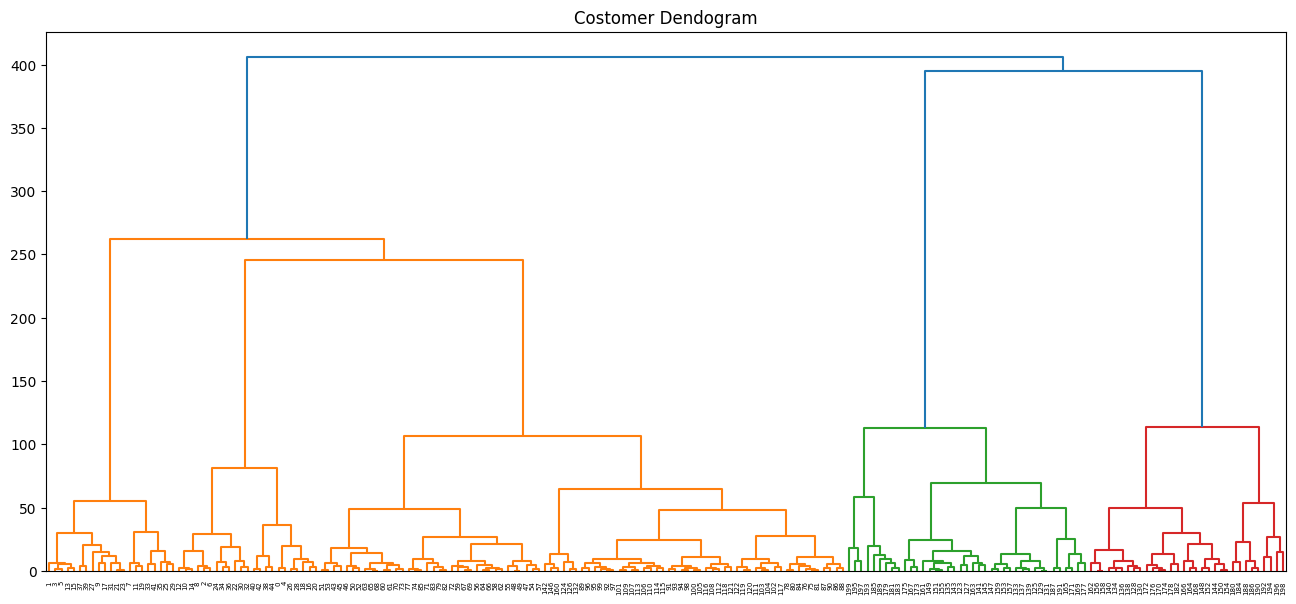

In [44]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize = (16,7))
plt.title('Costomer Dendogram')
dend = shc.dendrogram(shc.linkage(df,method='ward'))


In [45]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
labels_=cluster.fit_predict(df)

In [46]:
labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

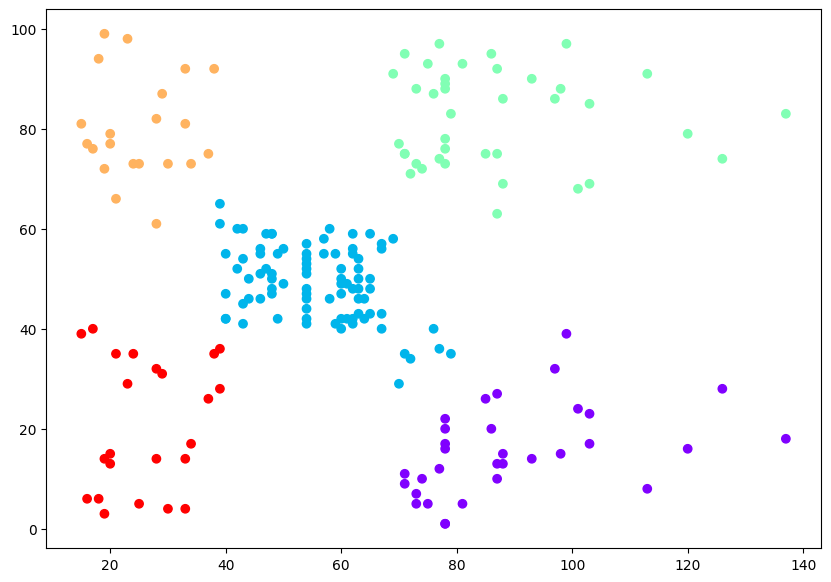

In [47]:
plt.figure(figsize = (10,7))
plt.scatter(df[:,0],df[:,1],c=cluster.labels_,cmap = 'rainbow')


In [48]:
df_clustered = pd.DataFrame(df, columns=['Feature1','Feature2'])
df_clustered['Cluster'] = labels_
df_clustered.head()


,Feature1,Feature2,Cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


In [49]:
df_clustered.groupby('Cluster').mean()


,Feature1,Feature2
Cluster,,
0,89.406250,15.593750
1,55.811765,49.129412
2,86.538462,82.128205
3,25.095238,80.047619
4,26.304348,20.913043


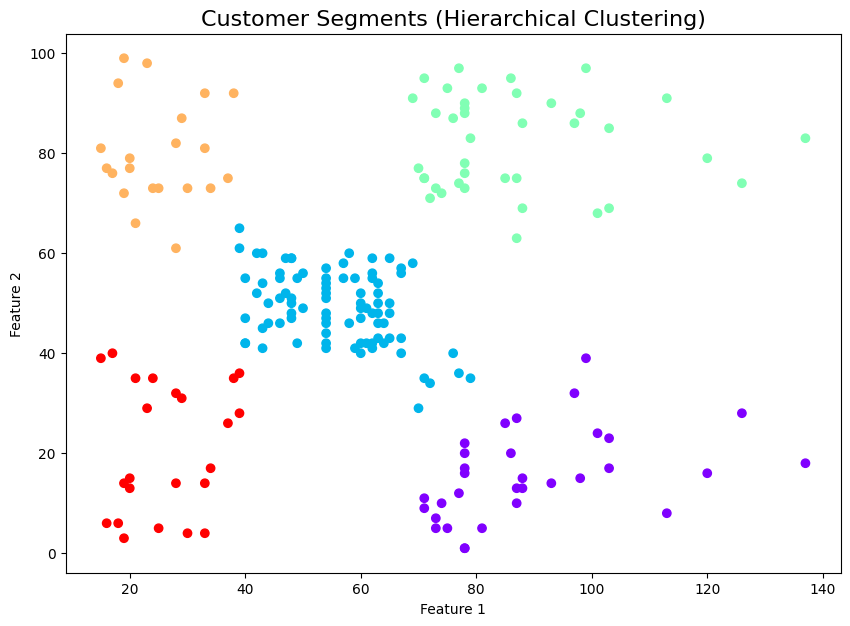

In [50]:
plt.figure(figsize=(10,7))
plt.scatter(df[:,0], df[:,1], c=labels_, cmap='rainbow')
plt.title("Customer Segments (Hierarchical Clustering)", fontsize=16)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [52]:
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
cluster

,n_clusters,3
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'ward'
,distance_threshold,None
,compute_distances,False


In [55]:
for n in [2,3,4,5]:
    cluster = AgglomerativeClustering(n_clusters=n, metric='euclidean', linkage='ward')
    labels = cluster.fit_predict(df)
    print(f"Clusters = {n} → Unique labels:", set(labels))

Clusters = 2 → Unique labels: {np.int64(0), np.int64(1)}
Clusters = 3 → Unique labels: {np.int64(0), np.int64(1), np.int64(2)}
Clusters = 4 → Unique labels: {np.int64(0), np.int64(1), np.int64(2), np.int64(3)}
Clusters = 5 → Unique labels: {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)}


### Conclusion
Based on hierarchical clustering (using Ward linkage and Euclidean distance), 
we identified X customer segments. Each segment shows different characteristics:

Cluster 0 → High income, low spending  
Cluster 1 → Low income, high spending  
Cluster 2 → Medium income, medium spending  

This segmentation can help in marketing strategy and personalized campaigns.


Clusters = 2 → Unique labels: {np.int64(0), np.int64(1)}
Clusters = 3 → Unique labels: {np.int64(0), np.int64(1), np.int64(2)}
Clusters = 4 → Unique labels: {np.int64(0), np.int64(1), np.int64(2), np.int64(3)}
Clusters = 5 → Unique labels: {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)}
